In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

normal_df = pd.read_csv("/kaggle/input/heartbeat/ptbdb_normal.csv",header=None)
anomaly_df = pd.read_csv("/kaggle/input/heartbeat/ptbdb_abnormal.csv",header=None)
train = pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv",header=None)
test =pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv",header=None)


# analysing the dataset

In [2]:
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [3]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [4]:
y = train.shape[1] - 1

class_labels = train[y].unique()
class_labels

class_names = {
    0: "N",
    1: "S",
    2: "V",
    3: "F",
    4: "Q"
}

In [5]:
def check_missing_values(df):
    print("\n--- Checking for Missing Values ---")
    missing_summary = df.isnull().sum()
    print("\nMissing values per column:")
    print(missing_summary)
    total_missing = missing_summary.sum()
    print(f"\nTotal missing values in the dataset: {total_missing}")

def check_duplicates(df):
    print("\n--- Checking for Duplicated Rows ---")
    duplicate_rows = df[df.duplicated()]
    print(f"Number of duplicate rows: {len(duplicate_rows)}")
    if len(duplicate_rows) > 0:
        print("\nDuplicated rows:")
        print(duplicate_rows)

if train is not None:
        check_missing_values(train)
        check_duplicates(train)


--- Checking for Missing Values ---

Missing values per column:
0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

Total missing values in the dataset: 0

--- Checking for Duplicated Rows ---
Number of duplicate rows: 0


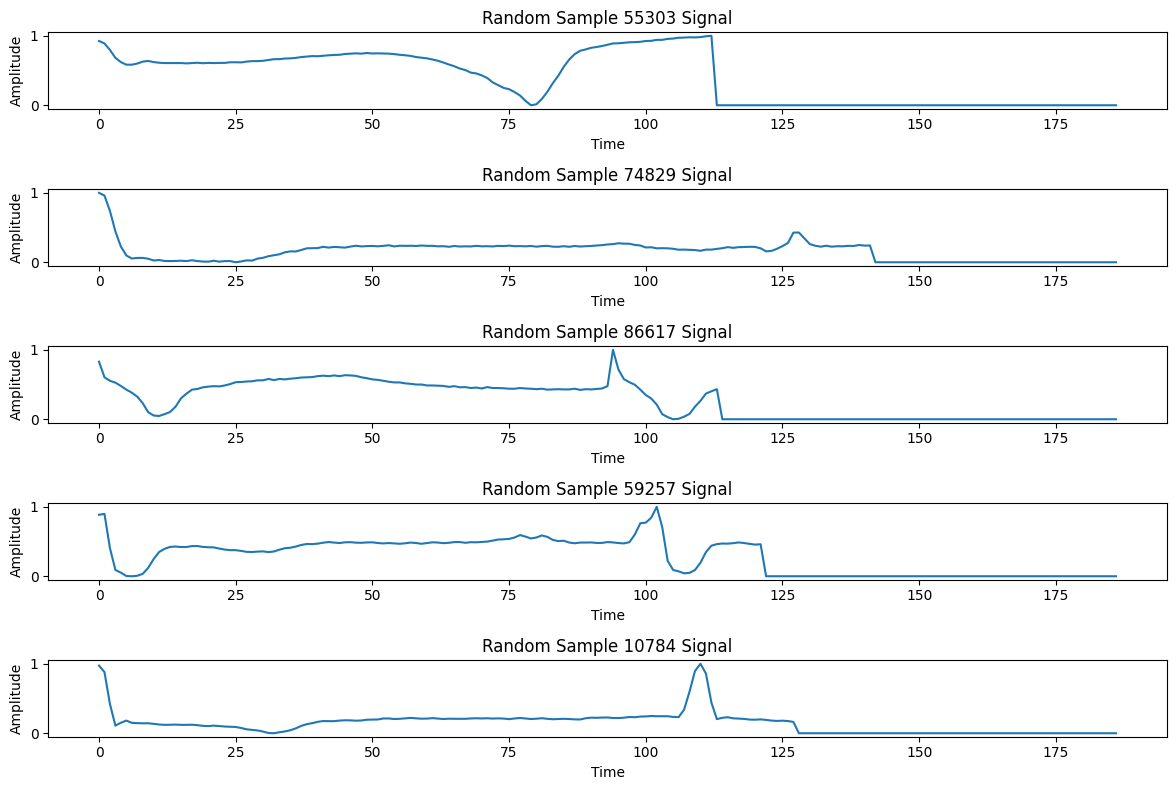

In [6]:
import random
import matplotlib.pyplot as plt

def plot_random_heartbeat_signal(data, num_samples=5):
    indices = random.sample(range(data.shape[0]), num_samples)  # Random indices
    plt.figure(figsize=(12, 8))
    
    for i, idx in enumerate(indices):
        plt.subplot(num_samples, 1, i+1)
        plt.plot(data.iloc[idx, :-1])
        plt.title(f'Random Sample {idx+1} Signal')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

plot_random_heartbeat_signal(train, num_samples=5)

In [7]:
train[187]=train[187].astype(float)
equilibre = train[187].value_counts()
print(equilibre)

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [8]:
test[187]=test[187].astype(float)
equilibre = test[187].value_counts()
print(equilibre)

187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


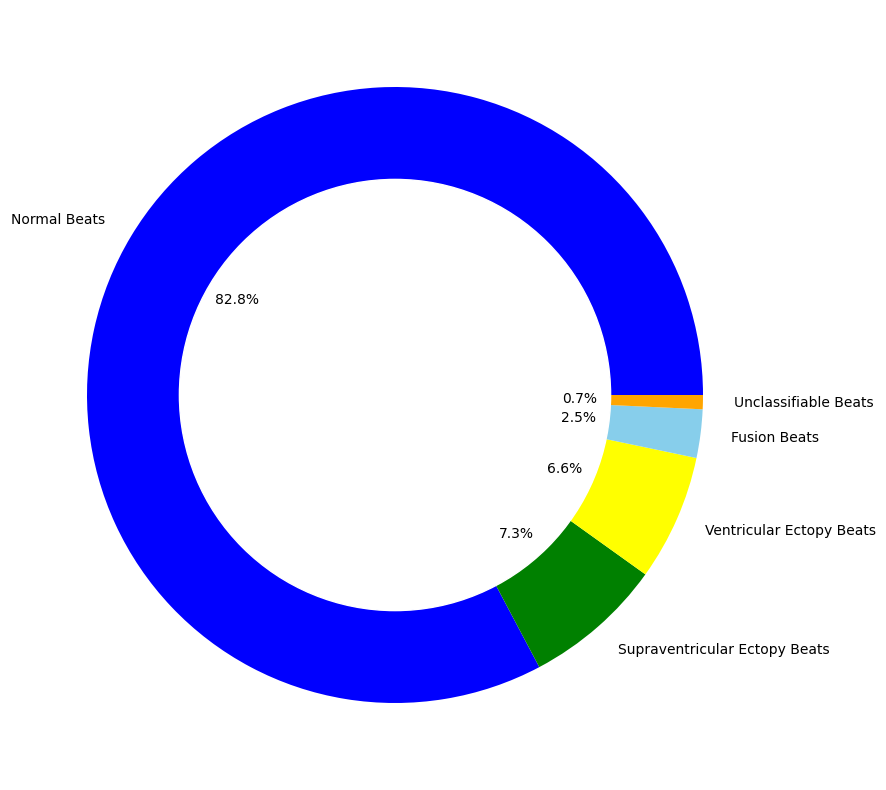

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], colors=['Blue','Green','Yellow','Skyblue','Orange'],autopct='%1.1f%%', textprops={'color': 'black'})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Preprocessing 

In [11]:
from sklearn.utils import resample
#Resampling the train data
df_1 = train[train[187] == 1]
df_2 = train[train[187] == 2]
df_3 = train[train[187] == 3]
df_4 = train[train[187] == 4]

df_1_upsample = resample(df_1, n_samples=20000, replace=True, random_state=123)
df_2_upsample = resample(df_2, n_samples=20000, replace=True, random_state=123)
df_3_upsample = resample(df_3, n_samples=20000, replace=True, random_state=123)
df_4_upsample = resample(df_4, n_samples=20000, replace=True, random_state=123)
df_0 = train[train[187] == 0].sample(n=20000, random_state=123)

train = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

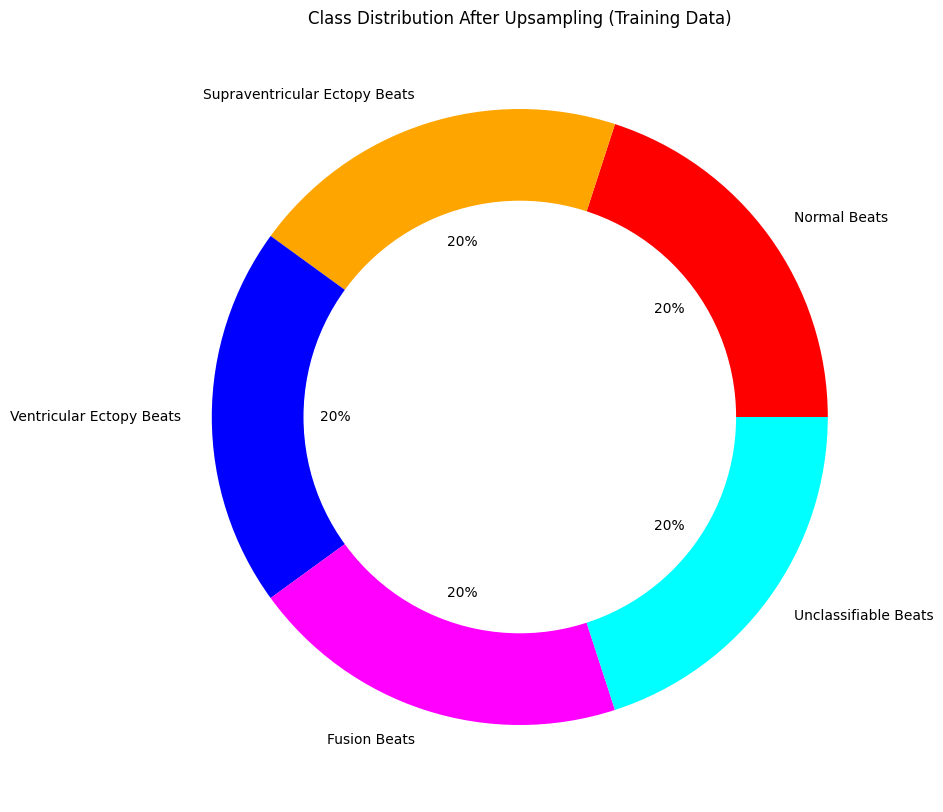

In [12]:
plt.figure(figsize=(10, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(train[187].value_counts(), 
        labels=['Normal Beats', 'Supraventricular Ectopy Beats', 'Ventricular Ectopy Beats', 'Fusion Beats', 'Unclassifiable Beats'], 
        autopct='%0.0f%%', 
        colors=['red', 'orange', 'blue', 'magenta', 'cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Class Distribution After Upsampling (Training Data)")
plt.show()

In [13]:
#Resampling the test data

df_1_t = test[test[187] == 1]
df_2_t = test[test[187] == 2]
df_3_t = test[test[187] == 3]
df_4_t = test[test[187] == 4]

df_1_upsample_t = resample(df_1_t, n_samples=5000, replace=True, random_state=123)
df_2_upsample_t = resample(df_2_t, n_samples=5000, replace=True, random_state=123)
df_3_upsample_t = resample(df_3_t, n_samples=5000, replace=True, random_state=123)
df_4_upsample_t = resample(df_4_t, n_samples=5000, replace=True, random_state=123)
df_0_t = test[test[187] == 0].sample(n=5000, random_state=123)

test = pd.concat([df_0_t, df_1_upsample_t, df_2_upsample_t, df_3_upsample_t, df_4_upsample_t])

In [14]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

In [17]:
from scipy.signal import butter, filtfilt
import numpy as np
# applying low-pass filter to eliminate high-frequency noise
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return np.array([filtfilt(b, a, row) for row in data.values])

sampling_rate = 125  
cutoff_frequency = 50  
X_train_filtered = butter_lowpass_filter(X_train, cutoff_frequency, sampling_rate)
X_test_filtered = butter_lowpass_filter(X_test, cutoff_frequency, sampling_rate)

# Decision Tree model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_filtered, y_train)
y_pred = dt_model.predict(X_test_filtered)

print("\n--- Model Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


--- Model Evaluation ---
Confusion Matrix:
[[4702  118  101   28   51]
 [1255 3572   98   43   32]
 [ 376   42 4415   80   87]
 [ 961    0  480 3559    0]
 [ 156   20  128    9 4687]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.94      0.76      5000
         1.0       0.95      0.71      0.82      5000
         2.0       0.85      0.88      0.86      5000
         3.0       0.96      0.71      0.82      5000
         4.0       0.96      0.94      0.95      5000

    accuracy                           0.84     25000
   macro avg       0.87      0.84      0.84     25000
weighted avg       0.87      0.84      0.84     25000


Accuracy Score: 0.8374


# Random Forest model

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators as needed
rf_model.fit(X_train_filtered, y_train)
y_pred = rf_model.predict(X_test_filtered)

print("\n--- Model Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



--- Model Evaluation ---
Confusion Matrix:
[[4951   18   17    2   12]
 [1285 3693    8    0   14]
 [ 250    3 4649   68   30]
 [ 943    0  587 3470    0]
 [ 167    7   24    0 4802]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.99      0.79      5000
         1.0       0.99      0.74      0.85      5000
         2.0       0.88      0.93      0.90      5000
         3.0       0.98      0.69      0.81      5000
         4.0       0.99      0.96      0.97      5000

    accuracy                           0.86     25000
   macro avg       0.90      0.86      0.86     25000
weighted avg       0.90      0.86      0.86     25000


Accuracy Score: 0.8626


# SVM model

In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)  # You can adjust the kernel (e.g., 'linear', 'poly', 'sigmoid')
svm_model.fit(X_train_filtered, y_train)
y_pred = svm_model.predict(X_test_filtered)

print("\n--- Model Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



--- Model Evaluation ---
Confusion Matrix:
[[4492  237   50  200   21]
 [ 731 4121   58   51   39]
 [ 147   30 4599  211   13]
 [ 136   25  183 4656    0]
 [  67   35   27    2 4869]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      5000
         1.0       0.93      0.82      0.87      5000
         2.0       0.94      0.92      0.93      5000
         3.0       0.91      0.93      0.92      5000
         4.0       0.99      0.97      0.98      5000

    accuracy                           0.91     25000
   macro avg       0.91      0.91      0.91     25000
weighted avg       0.91      0.91      0.91     25000


Accuracy Score: 0.90948


# NN model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

X_train_cnn = X_train_filtered[..., np.newaxis]
X_test_cnn = X_test_filtered[..., np.newaxis]

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_cnn, y_train_onehot, 
                    validation_data=(X_test_cnn, y_test_onehot), 
                    epochs=10, 
                    batch_size=32, 
                    callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_cnn, y_test_onehot)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)


print("\n--- Model Evaluation ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 56s 18ms/step - accuracy: 0.7941 - loss: 0.5539 - val_accuracy: 0.9082 - val_loss: 0.2685
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - accuracy: 0.9161 - loss: 0.2237 - val_accuracy: 0.9111 - val_loss: 0.3054
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - accuracy: 0.9421 - loss: 0.1575 - val_accuracy: 0.9187 - val_loss: 0.3281
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 56s 18ms/step - accuracy: 0.9548 - loss: 0.1222 - val_accuracy: 0.9246 - val_loss: 0.3284
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 57s 18ms/step - accuracy: 0.9640 - loss: 0.1004 - val_accuracy: 0.9175 - val_loss: 0.4049
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 56s 18ms/step - accuracy: 0.9693 - loss: 0.0870 - val_accuracy: 0.9203 - val_loss: 0.4978
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8808 - loss: 0.3338

Test Loss: 0.2684631049633026
Test Accuracy: 0.908240020275116
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step

--- Model Evaluation ---
Co